In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('china_gdp.csv')

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")
print(df.head())

Dataset loaded successfully!
Shape: (55, 2)
Columns: ['Year', 'Value'] 

   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


In [3]:
df.columns = ['Year', 'GDP']

x_data = df["Year"].values
y_data = df["GDP"].values


In [5]:
def logistic(x, a, b, c):
    """a = max GDP, b = growth rate, c = midpoint year"""
    return a / (1 + np.exp(-b * (x - c)))


p0 = [max(y_data), 0.03, 1990]  # initial guess for parameters

params, covariance = curve_fit(logistic, x_data, y_data, p0)
a, b, c = params

print(f"\n✅ Model parameters:")
print(f"a (Max GDP): {a:.2f}")
print(f"b (Growth rate): {b:.4f}")
print(f"c (Midpoint year): {c:.2f}")



✅ Model parameters:
a (Max GDP): 49990201760758.93
b (Growth rate): 0.1752
c (Midpoint year): 2021.37


In [6]:
y_pred = logistic(x_data, a, b, c)

In [8]:
r2 = r2_score(y_data, y_pred)
mae = mean_absolute_error(y_data, y_pred)
rmse = np.sqrt(mean_squared_error(y_data, y_pred))

print("\n Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


 Model Evaluation:
R² Score: 0.9938
Mean Absolute Error (MAE): 163272913209.67
Root Mean Squared Error (RMSE): 195234798044.26


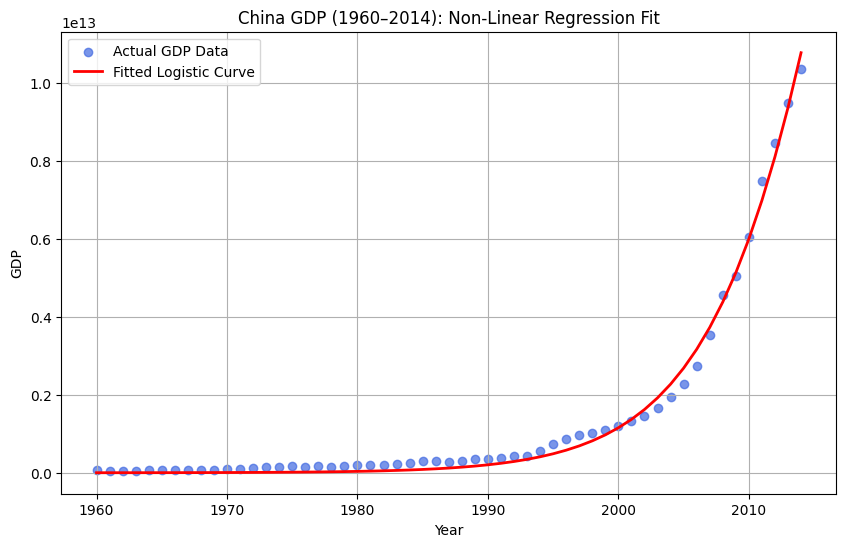

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Actual GDP Data", color="royalblue", alpha=0.7)
plt.plot(x_data, y_pred, color="red", linewidth=2, label="Fitted Logistic Curve")
plt.title("China GDP (1960–2014): Non-Linear Regression Fit")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.show()

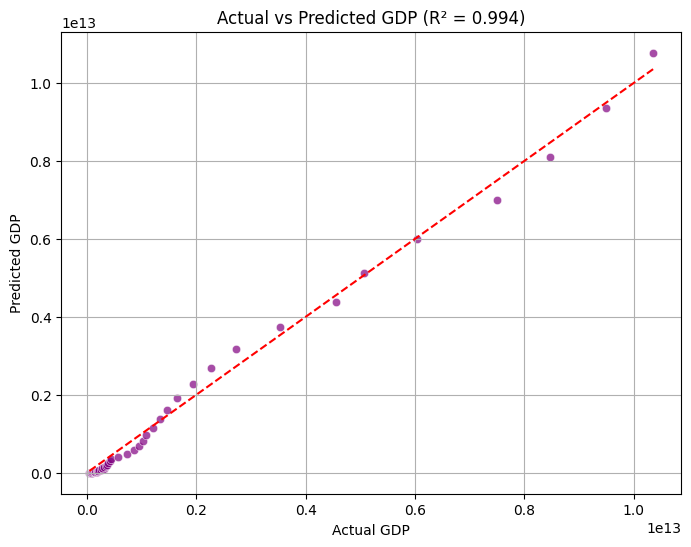

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_data, y=y_pred, color='purple', alpha=0.7)
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'r--')
plt.title(f"Actual vs Predicted GDP (R² = {r2:.3f})")
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.grid(True)
plt.show()